<h1><center>Module 5 Assignment </center></h1>
   
   
   
   <h4><center>Quyen Hoang</center></h4>
   
   
<h4><center>College of Professional Studies, Northeastern University</center></h4>
  
<h4><center> ALY 6020: Predictive Analytics </center></h4>
<h4><center>Professor Vladimir Shapiro </center></h4>

<h4><center>May 14 2023</center></h4>










## Introduction
1. ### Problem:

You just started working for a real estate company and they are looking to make a huge investment into the growing Nashville area. They’ve acquired a dataset about recent sales and want you to build a model to help them accurately find the best value deals when they go to visit next week. There is a concern that houses are going over their asking price and this dataset will help us observe that. Hint: You will have to create the dependent variable to understand whether it is over/under price (you can have multiple categories but remember the limitations of logistic vs decision tree type models).

1. ### Task 1: 
Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

2. ### Task  2:

Build a logistic regression model to accurately identify overpricing/underpricing and determine what is driving those prices.

3. ### Task 3:

Build a decision tree model and compare the results with the results of the previous model.

4. ### Task 4:

Build a Random Forest model and compare the results with the results of the previous models.

5. ### Task 5:

Build a Gradient Boost model and compare the results with the results of the previous models.

6. ### Task 6:

Build a Neural Network model and compare the results with those of the previous model.

7. ### Task 7:

Use multiple benchmarking metrics to compare and contrast the five models. Based on your findings, provide evidence of which model you believe the real estate company should use and what are the key variables to focus on to drive value and how can they get the most value out of the houses they should be targeting.

Remember the goal is to help the company make money and solve the problem of what variables to consider in good value properties, building an accurate model doesn't guarantee more money.



2. ### Data Dictionary:

- Land Use: What was land used for
- Sale Price: Sale price house
- Sold As Vacant: Was anyone living in the house
- Multiple Parcels Involved in Sale: Were multiple properties in sale
- Acreage: How big is the lot
- Tax District: Which district is the house in
- Land Value: How much is land worth
- Building Value: How much is building worth
- Total Value: How much is total property worth
- Finished Area: How much of the house is finished
- Foundation Type: Self explanatory
- Year Built: Self explanatory
- Exterior Wall: Type 
- Grade: Grade that was given to condition of house
- Bedrooms: Self explanatory
- Full Bath: Self explanatory
- Half Bath: Self explanatory
 




## Body/Analysis

In [1]:
### Loading libraries

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import tensorflow as tf

2023-05-17 09:03:56.084036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
## Loading data and data overview
df = pd.read_csv('Nashville_housing_data_2013_2016.csv')
df.head().style.set_table_attributes("style='display:inline'").set_caption('Table1: First 5 rows of the dataset')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

#### Findings: 
- Dataset has 56636 rows X 31 columns. 
- There are many columns with missing values. 
- A lot columns do not have their proper names - Unnamed: 0.1, Unnamed: 0 
- There might be duplicated columns: Address vs Property Address, City, Property City

### Task 1: Data Cleaning
- Use proper data cleansing techniques to ensure you have the highest quality data to model this problem.
- Detail your process and discuss the decisions you made to clean the data.

### 1. Checking for duplicated rows, columns

In [5]:
## Duplicated columns
df[['Property Address','Address','City', 'Property City','Unnamed: 0.1','Unnamed: 0']].head().style.set_table_attributes("style='display:inline'").set_caption('Table2: Duplicated Columns')

In [6]:
df = df.drop(['Address','City','Unnamed: 0.1','Unnamed: 0'], axis =1)

#### Findings:  
Dropping 4 duplicated columns 
- 'Unnamed: 0.1','Unnamed: 0' are duplicated of index. 
- 'Address' column is the duplicated column of 'Property Address' , 'City' column is the duplicated column of 'Property City'. 'Address' and 'City' have a lot of missing values so I am dropping them.

In [7]:
## Duplicated rows
print(f'There are {df.duplicated().sum()} rows. I am dropping them')
df = df.drop_duplicates()

There are 103 rows. I am dropping them


### 2. Create the dependent variable
The company want to build a model to help them accurately find the best value deals so I am going to create the model to predict whether the house is underpriced or not. 

I am create the dependent variable - 'under_price' by comparing the 'Total Value' and 'Sale Price' variables. 
- If 'Total Value' > 'Sale Price', under_price = 1
- If 'Total Value' <= 'Sale Price', under_price = 0

In [8]:
df['under_price'] = np.where(df['Sale Price'] <= df['Total Value'], 1 , 0)
df = df.drop(['Sale Price','Total Value'],axis=1)
df['under_price'].value_counts()

0    50064
1     6469
Name: under_price, dtype: int64

### 3. Checking for columns useless columns.

In [9]:
## Numerical and Categorical columns. 
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include = 'number')

#### Categorical Columns

In [10]:
for i in cat_col.columns:
    print(df[i].value_counts())
    print('------------------')

083 13 0 360.00     4
181 10 0A 281.00    4
119 02 0 178.00     4
049 10 0A 094.00    4
163 02 0B 034.00    4
                   ..
091 07 0 001.00     1
091 07 0 246.00     1
091 07 0 267.00     1
091 07 0B 002.00    1
093 13 0D 094.00    1
Name: Parcel ID, Length: 48697, dtype: int64
------------------
SINGLE FAMILY                                 34191
RESIDENTIAL CONDO                             14065
VACANT RESIDENTIAL LAND                        3579
VACANT RES LAND                                1575
DUPLEX                                         1388
ZERO LOT LINE                                  1048
CONDO                                           252
RESIDENTIAL COMBO/MISC                           95
TRIPLEX                                          92
QUADPLEX                                         39
CONDOMINIUM OFC  OR OTHER COM CONDO              35
CHURCH                                           33
MOBILE HOME                                      20
DORMITORY/BOARDING

In [11]:
df = df.drop(['Land Use','Parcel ID', 'Property Address', 'Legal Reference', 'Owner Name','State','image'], axis=1)

#### Findings: 
There are 5 columns that do not contribute to the model predictions => Dropping them
 - Parcel ID, Address, Legal Reference Owner Name: They have different values for different rows
 - Land Use: 80% of them are Single Family
 - State: 1 value for the whole column - TN
 - Image: shows name or url to the pictures of the house which is not using in this model

#### Numeric Columns

/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/2649647411.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=num_col[i[1]], data = num_col, palette ='hls')
/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/2649647411.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=num_col[i[1]], data = num_col, palette ='hls')
/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/2649647411.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=num_col[i[1]], data = num_col, palette ='hls')
/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/2649647411.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=num_col[i[1]], data = num_col, palette ='hls')
/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/2649647411.py:4: UserWarning: Ignoring `palette`

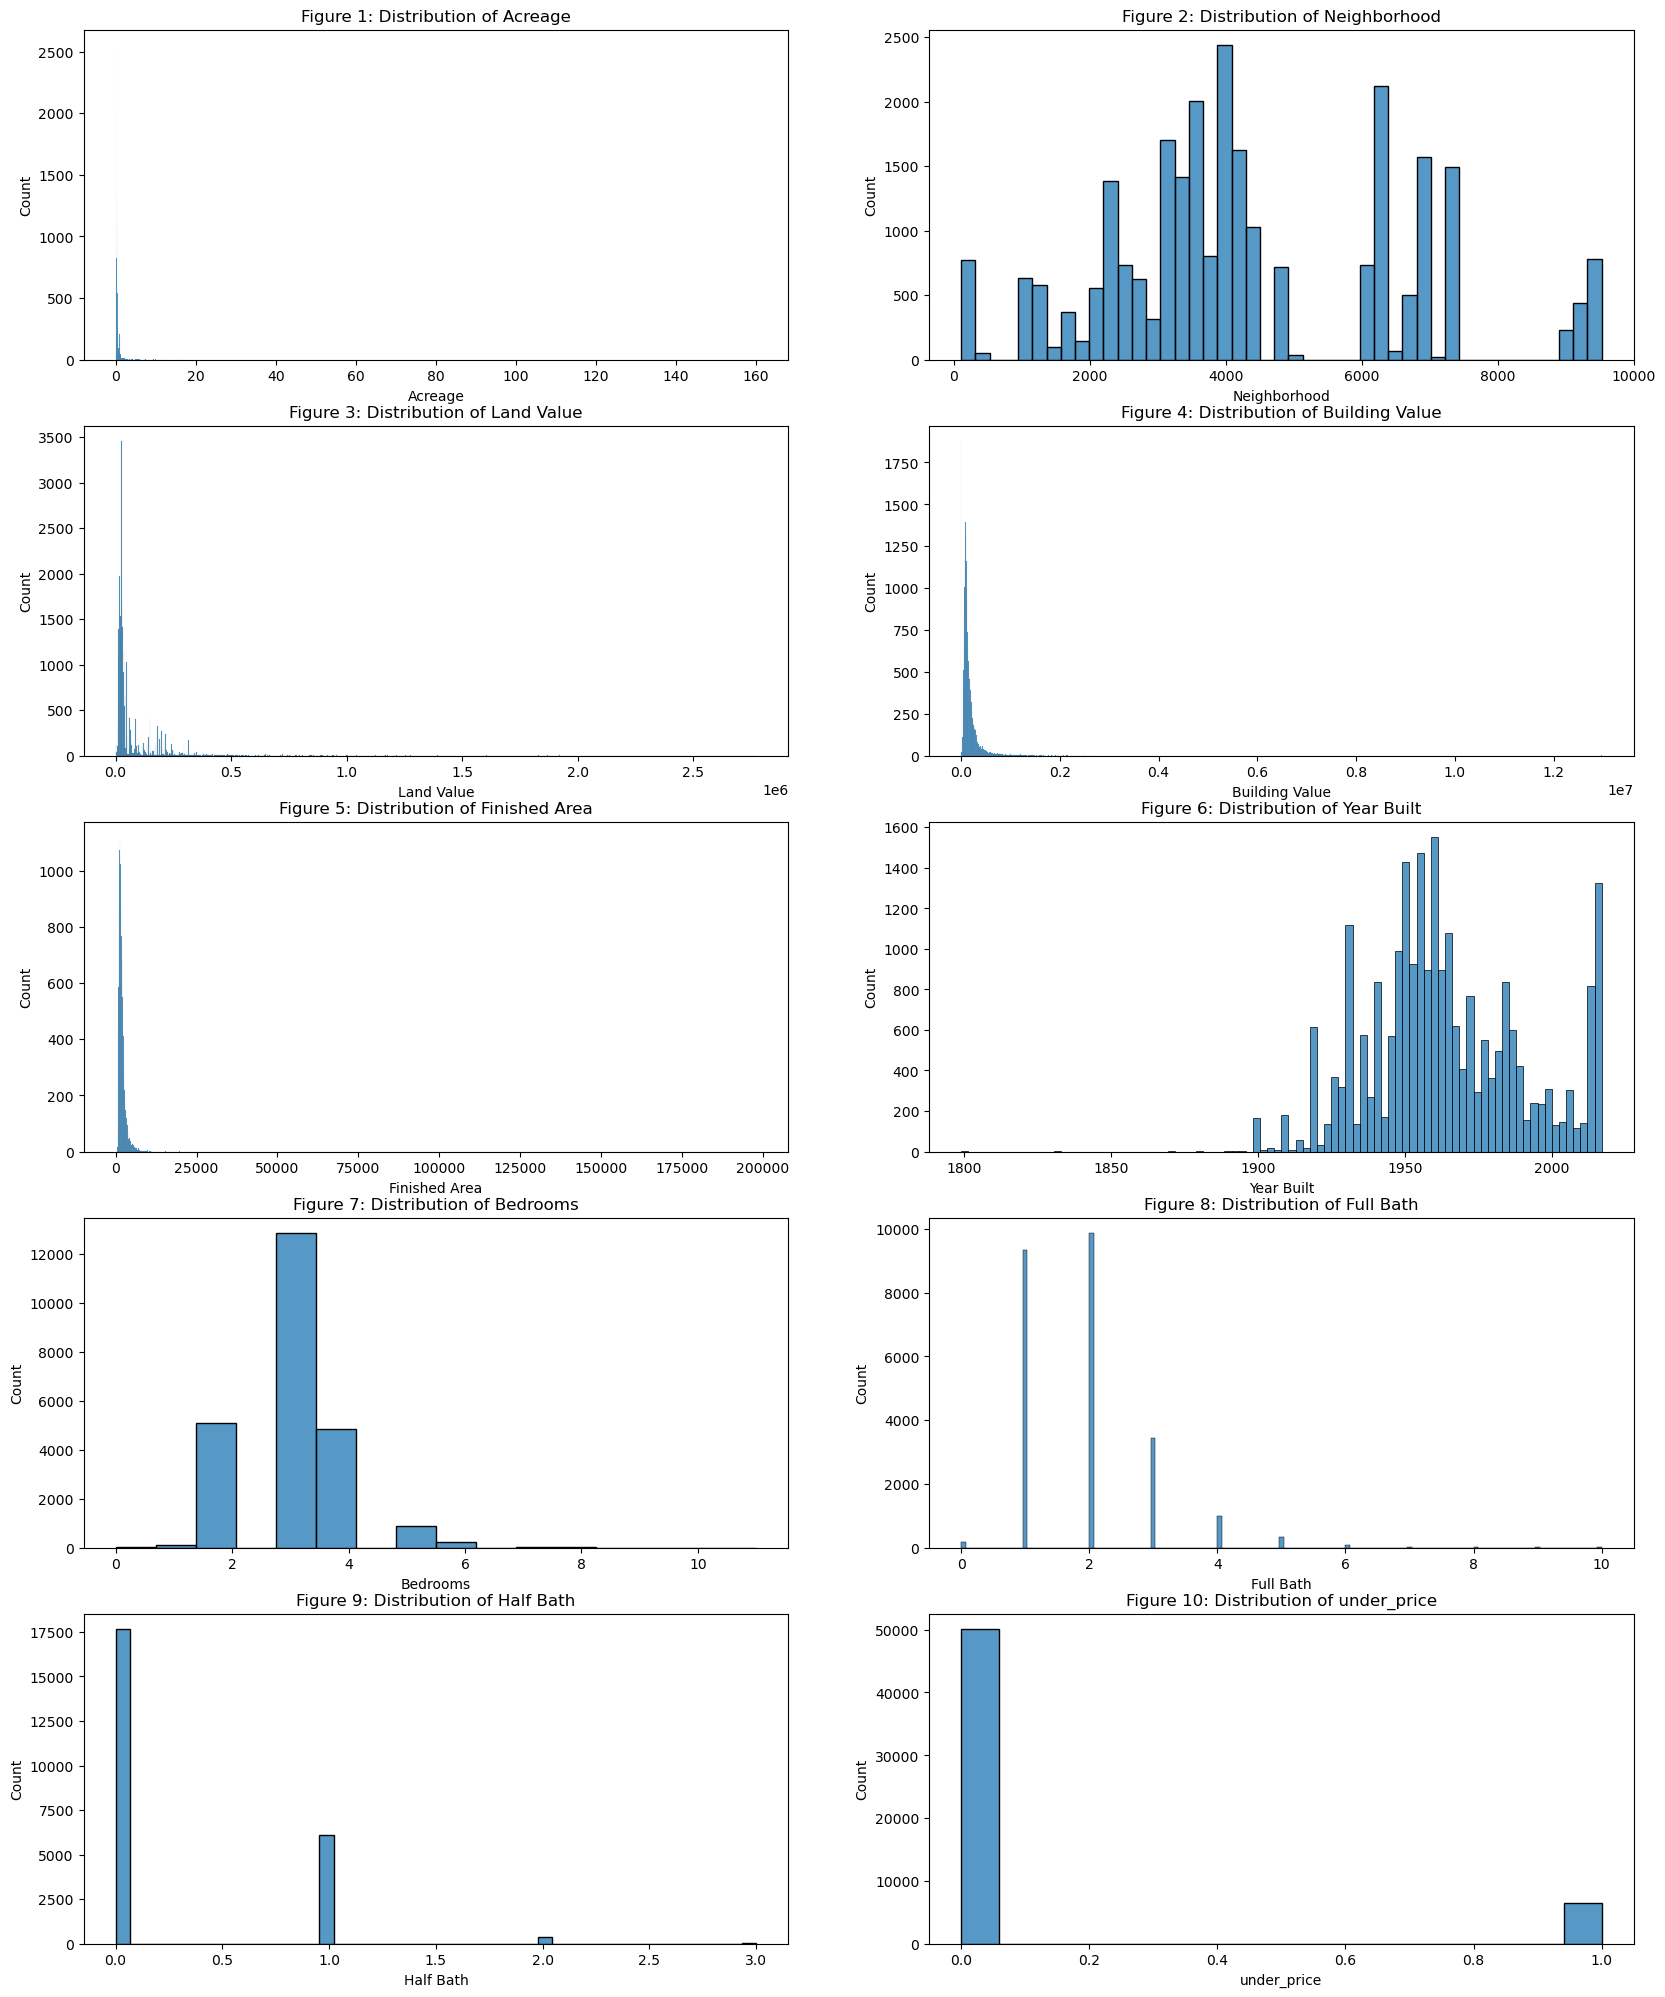

In [12]:
plt.figure(figsize=(20,30))
for i in enumerate (num_col.columns):
    plt.subplot(6,2,i[0]+1)
    sns.histplot(x=num_col[i[1]], data = num_col, palette ='hls')
    plt.title(f'Figure {1+i[0]}: Distribution of {i[1]}')

### Findlings:

- I am going to use all the numeric variables
- There are some outliers but I am going to handle it in the Outliers part. 

#### 3. Missing values

In [13]:
!pip install -U ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached matplotlib-3.6.3-cp39-cp39-macosx_10_12_x86_64.whl (7.3 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 42.0 MB/s eta 0:00:0000:0100:01
  Using cached scipy-1.9.3-cp39-cp39-macosx_10_9_x86_64.whl (34.3 MB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    F

/Users/bimbim/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/bimbim/opt/anaconda3/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
## Have a look at the percentage of missing value per column
notna = pd.DataFrame(df.notnull().sum()/len(df)*100).reset_index().sort_values(by=0)
notna

index           0
0                    Suite/ Condo   #   10.800771
17                          Half Bath   42.631737
15                           Bedrooms   42.654733
11                    Foundation Type   42.663577
14                              Grade   42.665346
13                      Exterior Wall   42.665346
12                         Year Built   42.665346
10                      Finished Area   42.667115
16                          Full Bath   42.863460
9                      Building Value   45.939540
7                        Neighborhood   45.939540
6                        Tax District   45.939540
5                             Acreage   45.939540
8                          Land Value   45.939540
1                       Property City   99.718748
4   Multiple Parcels Involved in Sale  100.000000
3                      Sold As Vacant  100.000000
2                           Sale Date  100.000000
18                        under_price  100.000000

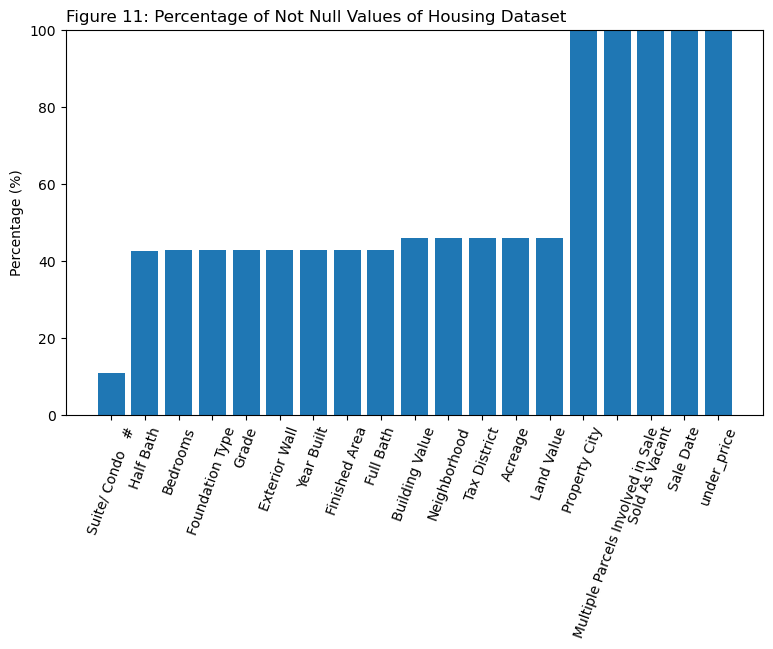

In [15]:
plt.figure(figsize=(9,5))
plt.bar(notna['index'], notna[0])
plt.title('Figure 11: Percentage of Not Null Values of Housing Dataset', loc = 'left')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=70)
plt.ylim(0,100)
plt.show()

#### Findings: 
 - 18 out of 27 columns have more than 50% of their data are missing (Suite/Condo # has 89% data missing -> dropping it)
 - If dropping all the missing values columnsm 9 columns left( 'Parcel ID', 'Land Use', 'Property Address', 'Property City', 'Sale Date', 'Sale Price', 'Legal Reference', 'Sold As Vacant', 'Multiple Parcels Involved in Sale' are not good enough for the prediction).
 - More than half of data in the columns are missing so using the imputation method to fill the missing values is not a good solution. 
 - Let's see if there is a pattern between missing values, if yes, we will lose fewer data when removing missing values than when the missing points are random. 


In [16]:
### Dropping Suite/Condo column
df = df.drop('Suite/ Condo   #', axis=1)


Let's take a look closer to see if there is relationships between the missing values between columns

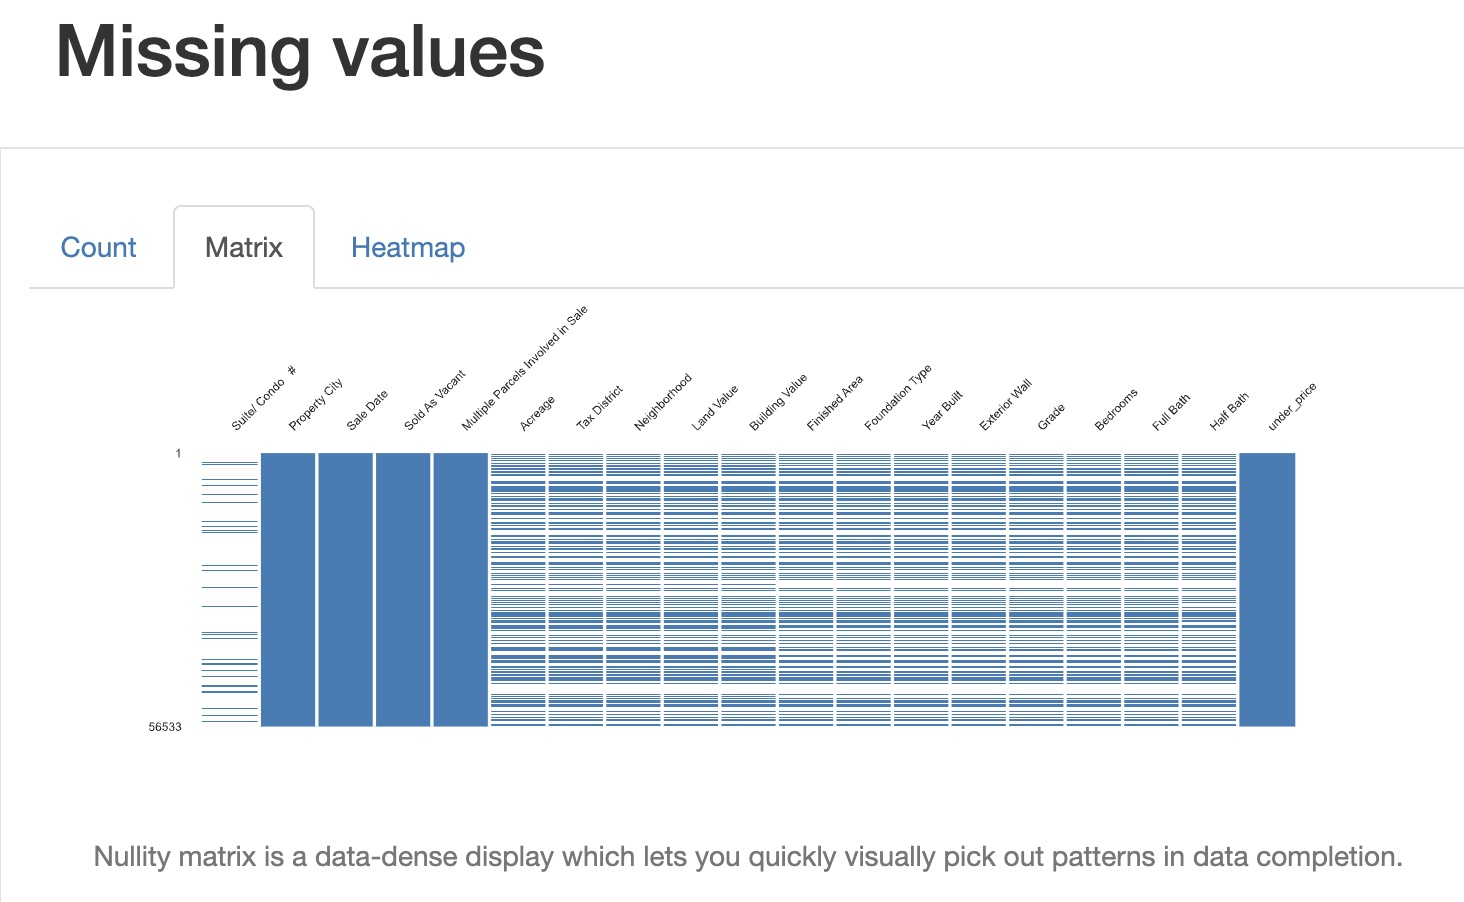

 - There is a pattern here between the columns having missing values. For example, an obsevation has missing data in Owner Name, there is likely that it has missing values in Address, City, and the rest of the other missing columns. 
 - Removing all the missing values will not lose that many data compared to when the missing values are random. 

#### Dropping all the missing values

In [17]:
## Drop missing values
new_df = df.dropna()
len(new_df)/len(df)*100

42.39293863760989

In [18]:
new_df['under_price'].value_counts()

0    17754
1     6212
Name: under_price, dtype: int64

After dropping all the missing values, we have the new_df which has around 42.3% data of the original dataset. 

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23966 entries, 1 to 56616
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Property City                      23966 non-null  object 
 1   Sale Date                          23966 non-null  object 
 2   Sold As Vacant                     23966 non-null  object 
 3   Multiple Parcels Involved in Sale  23966 non-null  object 
 4   Acreage                            23966 non-null  float64
 5   Tax District                       23966 non-null  object 
 6   Neighborhood                       23966 non-null  float64
 7   Land Value                         23966 non-null  float64
 8   Building Value                     23966 non-null  float64
 9   Finished Area                      23966 non-null  float64
 10  Foundation Type                    23966 non-null  object 
 11  Year Built                         23966 non-null  flo

In [20]:
new_df.describe()

Acreage  Neighborhood    Land Value  Building Value  \
count  23966.000000  23966.000000  2.396600e+04    2.396600e+04   
mean       0.454762   4426.758742  6.901955e+04    1.724026e+05   
std        0.790563   2137.753388  1.019638e+05    1.928686e+05   
min        0.040000    107.000000  1.000000e+02    1.400000e+03   
25%        0.190000   3130.000000  2.200000e+04    8.350000e+04   
50%        0.270000   4026.000000  2.990000e+04    1.172000e+05   
75%        0.450000   6229.000000  6.030000e+04    1.887000e+05   
max       47.500000   9530.000000  1.869000e+06    5.824300e+06   

       Finished Area    Year Built      Bedrooms     Full Bath     Half Bath  \
count   23966.000000  23966.000000  23966.000000  23966.000000  23966.000000   
mean     1915.592246   1963.640157      3.091296      1.892973      0.285446   
std      1104.205574     26.435094      0.852195      0.954690      0.488818   
min       450.000000   1799.000000      0.000000      0.000000      0.000000   
25%      1237.000000   1948.000000      3.000000      1.000000      0.000000   
50%      1630.000000   1960.000000      3.000000      2.000000      0.000000   
75%      2211.211258   1983.000000      4.000000      2.000000      1.000000   
max     19728.249880   2017.000000     11.000000     10.000000      3.000000   

        under_price  
count  23966.000000  
mean       0.259201  
std        0.438205  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

 ### 4. Outliers

In [21]:
cat_col = new_df.select_dtypes(exclude='number')
num_col = new_df.select_dtypes(include = 'number')

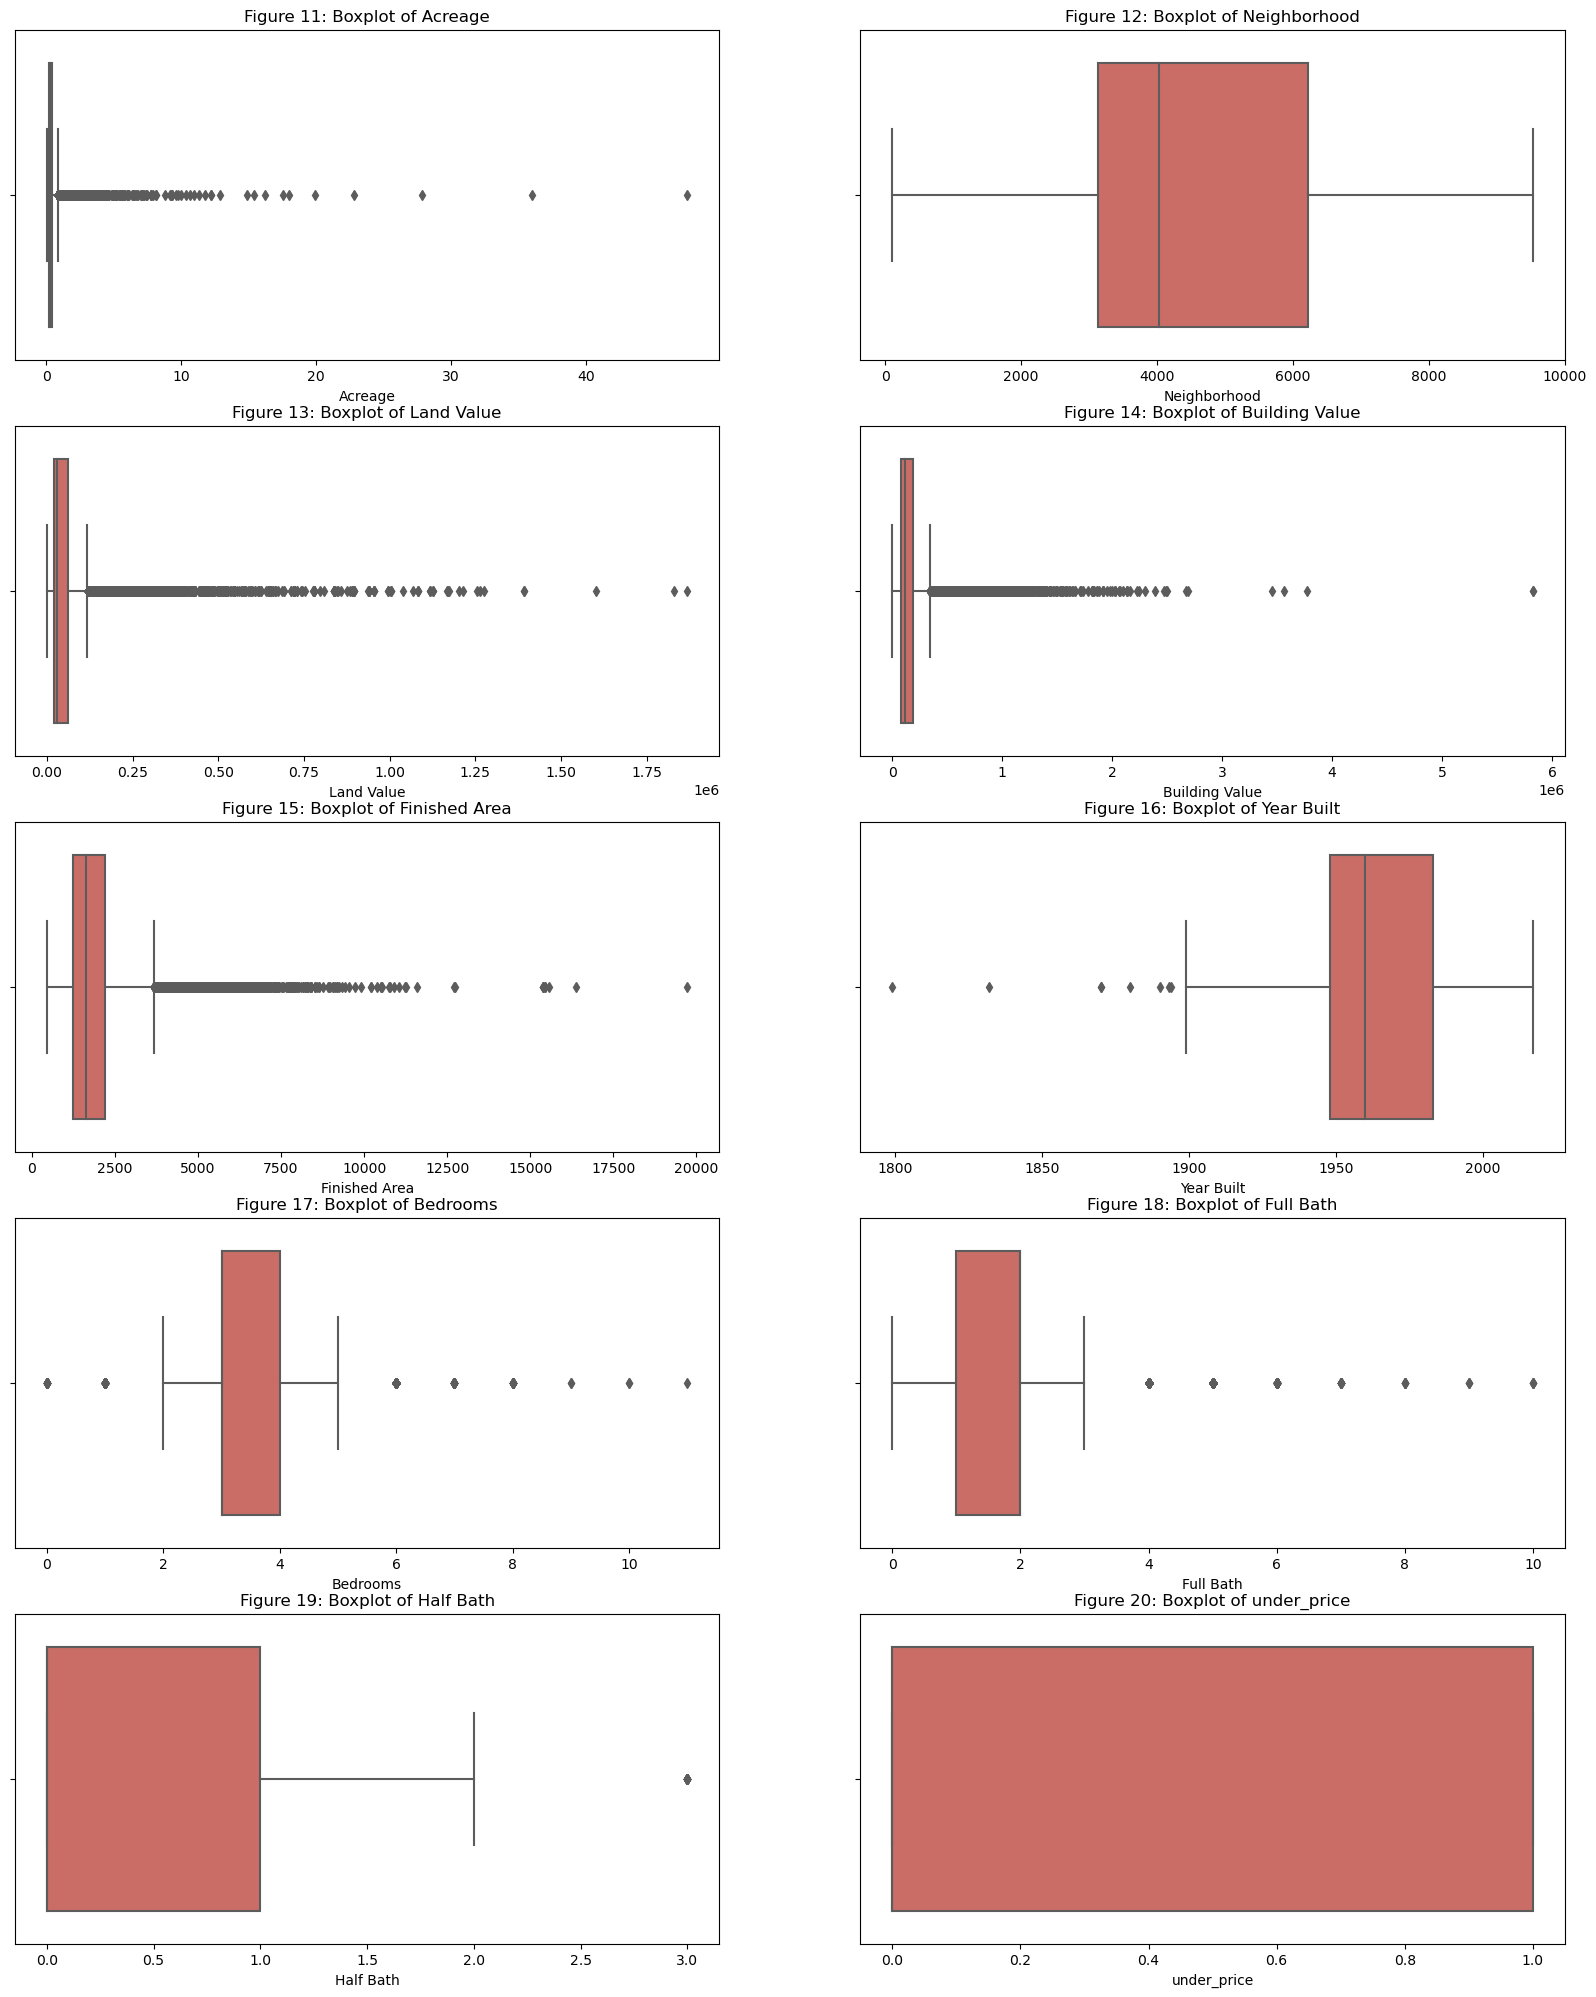

In [22]:
plt.figure(figsize=(20,30))
for i in enumerate (num_col.columns):
    plt.subplot(6,2,i[0]+1)
    sns.boxplot(x=num_col[i[1]], data = num_col, palette ='hls')
    plt.title(f'Figure {11+i[0]}: Boxplot of {i[1]}')

Findings:

- All of the numerical columns have outliers. 
- I do not have the domain knowledge to identify the outliers we should keep and remove. I am going to remove all of the outliers for the sake of model performance. 


In [23]:
### Identify upper and lower bound using interquatile
def detect_upr_lwr_bound_iqr(data): 
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    return [upr_bound, lwr_bound] # Driver code

In [24]:
## Acreage
acreage_upr_lwr = detect_upr_lwr_bound_iqr(new_df['Acreage'])
new_df = new_df[(new_df['Acreage']<acreage_upr_lwr[0]) & (new_df['Acreage']>acreage_upr_lwr[1])]
print(new_df.shape)


(20813, 18)


In [25]:
## Land Value
LandValue_upr_lwr = detect_upr_lwr_bound_iqr(new_df['Land Value'])
new_df = new_df[(new_df['Land Value']<LandValue_upr_lwr[0]) & (new_df['Land Value']>LandValue_upr_lwr[1])]
print(new_df.shape)
## Building Value
BuildingValue_upr_lwr = detect_upr_lwr_bound_iqr(new_df['Building Value'])
new_df = new_df[(new_df['Building Value']<BuildingValue_upr_lwr[0]) & (new_df['Building Value']>BuildingValue_upr_lwr[1])]
print(new_df.shape)
## Finished Area
FinishedArea_upr_lwr = detect_upr_lwr_bound_iqr(new_df['Finished Area'])
new_df = new_df[(new_df['Finished Area']<FinishedArea_upr_lwr[0]) & (new_df['Finished Area']>FinishedArea_upr_lwr[1])]
print(new_df.shape)


(17381, 18)
(16257, 18)
(15993, 18)


In [26]:
## Year Built
YearBuilt_upr_lwr = detect_upr_lwr_bound_iqr(new_df['Year Built'])
new_df = new_df[(new_df['Year Built']<YearBuilt_upr_lwr[0]) & (new_df['Year Built']>YearBuilt_upr_lwr[1])]
print(new_df.shape)
## Full Bath
FullBath_upr_lwr = detect_upr_lwr_bound_iqr(new_df['Full Bath'])
new_df = new_df[(new_df['Full Bath']<FullBath_upr_lwr[0]) & (new_df['Full Bath']>FullBath_upr_lwr[1])]
print(new_df.shape)
## Bedrooms
Bedrooms_upr_lwr = detect_upr_lwr_bound_iqr(new_df['Bedrooms'])
new_df = new_df[(new_df['Bedrooms']>2) & (new_df['Bedrooms']<6)]
print(new_df.shape)


(15914, 18)
(15777, 18)
(11384, 18)


/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/1452216514.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(),annot = True)


Text(0.5, 1.0, 'Figure 21: Heat map Correlation Matrix')

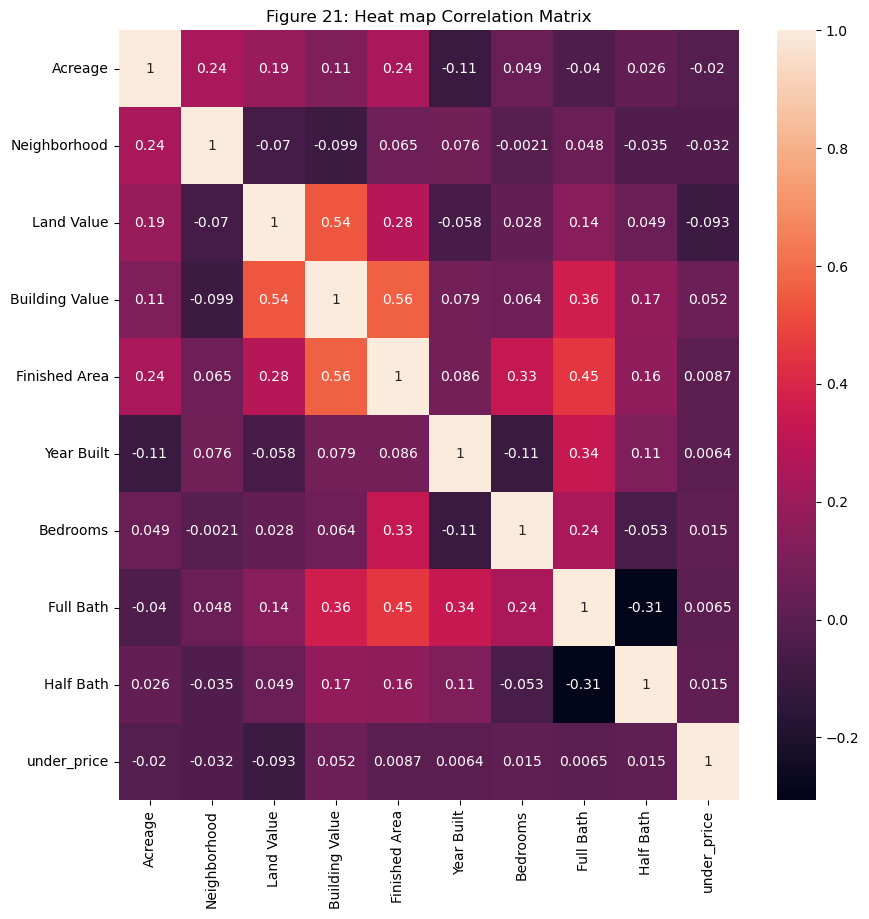

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(new_df.corr(),annot = True)
plt.title('Figure 21: Heat map Correlation Matrix')

### Feature Engineering

In [28]:
new_df['Sale Date'] = pd.to_datetime(new_df['Sale Date'])
new_df['Sale_Year'] = new_df['Sale Date'].dt.year
new_df['Sale_Month'] = new_df['Sale Date'].dt.month
new_df['Sale_Day'] = new_df['Sale Date'].dt.day
new_df['Dt_Dayofweek'] = new_df['Sale Date'].dt.dayofweek
new_df['Dt_date_is_weekend'] = np.where(new_df['Dt_Dayofweek'].isin([5,6]),1,0) ## check if date is weekend or not
new_df = new_df.drop('Sale Date',axis=1)

/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/4083267710.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_df[new_df['under_price']==1]["Sale_Year"], shade=True, color="blue", label="Under", ax=ax)
/var/folders/f9/g9rfrwmn3vq0r6knj1tlk5kc0000gn/T/ipykernel_2965/4083267710.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_df[new_df['under_price']==0]["Sale_Year"], shade=True, color="green", label="Over", ax=ax)


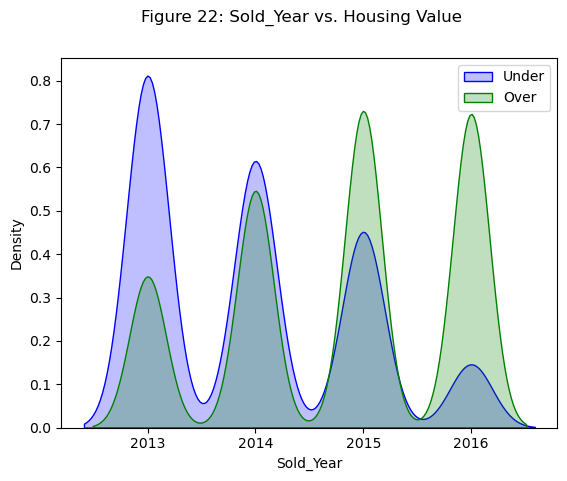

In [29]:
fig, ax = plt.subplots()

sns.kdeplot(new_df[new_df['under_price']==1]["Sale_Year"], shade=True, color="blue", label="Under", ax=ax)
sns.kdeplot(new_df[new_df['under_price']==0]["Sale_Year"], shade=True, color="green", label="Over", ax=ax)

ax.set_xlabel("Sold_Year")
ax.set_ylabel("Density")

fig.suptitle("Figure 22: Sold_Year vs. Housing Value")
ax.legend();

Houses tend to be overpriced over the time from 2013 to 2016. 

### Data Transformation

In [30]:
cat_col = new_df.select_dtypes(exclude='number')
num_col = new_df.select_dtypes(include = 'number')

In [31]:
### One-hot-encoding for Categorical variables without ranking.
df_encoded = pd.get_dummies(new_df, columns = [ 'Property City', 'Tax District', 'Foundation Type',
       'Exterior Wall', 'Grade'], drop_first = True)
df_encoded.shape

(11384, 42)

In [32]:
### Label encoding for ranking Categorial variables. 
df_encoded['Sold As Vacant'] = np.where(df_encoded['Sold As Vacant']=='Yes',1,0)
df_encoded['Multiple Parcels Involved in Sale'] = np.where(df_encoded['Multiple Parcels Involved in Sale']=='Yes',1,0)

In [33]:
df_encoded['under_price'].value_counts()

0    8708
1    2676
Name: under_price, dtype: int64

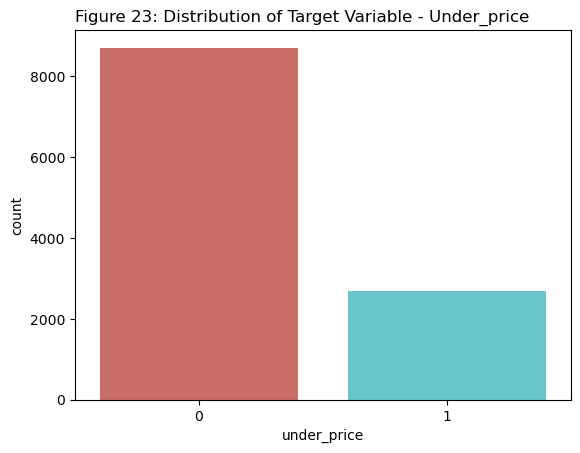

In [34]:
sns.countplot(x='under_price', data =df_encoded, palette ='hls')
plt.title('Figure 23: Distribution of Target Variable - Under_price', loc = 'left')
plt.show()

In [35]:
# df_encoded.corr()

### Define Target and Predictors



In [36]:
## Define X, y 
X = df_encoded.drop(['under_price'], axis = 1)
y = df_encoded['under_price']

#### Checking for multicollinearity by using Variance Inflation Factor

In [37]:
## Using variance inflation factor to measure for collinearity between predictors
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by = 'VIF Factor', ascending = False).head(15)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


VIF Factor                                features
11  13977.169642                               Sale_Year
7   12372.757492                              Year Built
25    550.886227    Tax District_URBAN SERVICES DISTRICT
24    168.598402  Tax District_GENERAL SERVICES DISTRICT
8      71.813521                                Bedrooms
6      37.564247                           Finished Area
23     31.891775     Tax District_CITY OF GOODLETTSVILLE
38     28.563500                              Grade_C   
5      20.683959                          Building Value
9      19.187133                               Full Bath
17     17.285393            Property City_GOODLETTSVILLE
3      14.280129                            Neighborhood
20     11.469062                 Property City_NASHVILLE
4      10.232139                              Land Value
2       7.023347                                 Acreage

- The VIF score supports our observations from the correlation matrix. 
- There is multicollinearity problem in independent variables. 
    - Sale_Year and Year Built are the two with highest VIF score of 13977 and 12372 respectively. 
- I am going to remove the top 10 highly correlation vairiables to see how much the issue improve. 

In [38]:
# list(vif.sort_values(by = 'VIF Factor', ascending = False)['features'])

In [39]:
X1 = X.drop(['Sale_Year',
 'Year Built',
 'Tax District_URBAN SERVICES DISTRICT',
 'Tax District_GENERAL SERVICES DISTRICT',
 'Bedrooms',
 'Finished Area',
 'Tax District_CITY OF GOODLETTSVILLE',
 'Grade_C   ','Building Value',
 'Full Bath',
 'Property City_GOODLETTSVILLE',
 'Neighborhood',
 'Property City_NASHVILLE',
 'Land Value',], axis=1)

In [40]:
# Calculating VIF 2
vif = pd.DataFrame()           
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif.sort_values(by = 'VIF Factor', ascending = False).head(10)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


VIF Factor                   features
2     4.413311                    Acreage
4     4.257685                 Sale_Month
5     3.810614                   Sale_Day
6     3.068684               Dt_Dayofweek
19    1.870264        Exterior Wall_FRAME
3     1.364417                  Half Bath
13    1.351130  Foundation Type_FULL BSMT
17    1.313415  Exterior Wall_BRICK/FRAME
25    1.230826                 Grade_D   
16    1.220778       Foundation Type_SLAB

All VIF scores are lower than 5. We should not be worried about the collinearity problem any more.

#### Test train split

In [41]:
### Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y, random_state = 42, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

(7968, 27)
(3416, 27)


In [42]:
X_train.columns

Index(['Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Acreage',
       'Half Bath', 'Sale_Month', 'Sale_Day', 'Dt_Dayofweek',
       'Dt_date_is_weekend', 'Property City_BRENTWOOD',
       'Property City_HERMITAGE', 'Property City_MADISON',
       'Property City_OLD HICKORY', 'Property City_WHITES CREEK',
       'Foundation Type_FULL BSMT', 'Foundation Type_PIERS',
       'Foundation Type_PT BSMT', 'Foundation Type_SLAB',
       'Exterior Wall_BRICK/FRAME', 'Exterior Wall_CONC BLK',
       'Exterior Wall_FRAME', 'Exterior Wall_FRAME/STONE', 'Exterior Wall_LOG',
       'Exterior Wall_METAL', 'Exterior Wall_STONE', 'Exterior Wall_STUCCO',
       'Grade_D   ', 'Grade_E   '],
      dtype='object')

## Task 2: Logistic Model

Build a logistic model to accurately predict subscription behavior. Discuss which variables are significant, their business impact, and how that may help you learn about the business.

In [43]:
## Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [44]:
y_train.value_counts()

0    6105
1    1863
Name: under_price, dtype: int64

In [45]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train,X_train_std).fit()

Optimization terminated successfully.
         Current function value: 0.595692
         Iterations 9


In [46]:
log_reg.summary(xname = ['Sold As Vacant', 'Multiple Parcels Involved in Sale', 'Acreage',
       'Half Bath', 'Sale_Month', 'Sale_Day', 'Dt_Dayofweek',
       'Dt_date_is_weekend', 'Property City_BRENTWOOD',
       'Property City_HERMITAGE', 'Property City_MADISON',
       'Property City_OLD HICKORY', 'Property City_WHITES CREEK',
       'Foundation Type_FULL BSMT', 'Foundation Type_PIERS',
       'Foundation Type_PT BSMT', 'Foundation Type_SLAB',
       'Exterior Wall_BRICK/FRAME', 'Exterior Wall_CONC BLK',
       'Exterior Wall_FRAME', 'Exterior Wall_FRAME/STONE', 'Exterior Wall_LOG',
       'Exterior Wall_METAL', 'Exterior Wall_STONE', 'Exterior Wall_STUCCO',
       'Grade_D   ', 'Grade_E   '])

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            under_price   No. Observations:                 7968
Model:                          Logit   Df Residuals:                     7941
Method:                           MLE   Df Model:                           26
Date:                Wed, 17 May 2023   Pseudo R-squ.:                -0.09535
Time:                        09:05:29   Log-Likelihood:                -4746.5
converged:                       True   LL-Null:                       -4333.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Sold As Vacant                        7.8545      0.226     34.798      0.000       7.412       8.297
Multiple Parcels Involved in Sale    -0.0398      0.028     -1.448      0.148      -0.094       0.014
Acreage                              -0.0021      0.027     -0.078      0.938      -0.055       0.051
Half Bath                             0.0242      0.025      0.953      0.341      -0.026       0.074
Sale_Month                           -0.1108      0.025     -4.451      0.000      -0.160      -0.062
Sale_Day                             -0.0678      0.025     -2.733      0.006      -0.116      -0.019
Dt_Dayofweek                         -0.0582      0.025     -2.336      0.019      -0.107      -0.009
Dt_date_is_weekend                    0.0082      0.025      0.334      0.738      -0.040       0.056
Property City_BRENTWOOD              -0.0463      0.031     -1.484      0.138      -0.107       0.015
Property City_HERMITAGE              -0.0460      0.026     -1.754      0.079      -0.097       0.005
Property City_MADISON                 0.0923      0.024      3.846      0.000       0.045       0.139
Property City_OLD HICKORY             0.0481      0.024      1.971      0.049       0.000       0.096
Property City_WHITES CREEK            0.0701      0.034      2.081      0.037       0.004       0.136
Foundation Type_FULL BSMT             0.0003      0.026      0.010      0.992      -0.051       0.052
Foundation Type_PIERS                -0.0048      0.025     -0.193      0.847      -0.053       0.044
Foundation Type_PT BSMT               0.0154      0.025      0.617      0.537      -0.034       0.064
Foundation Type_SLAB                 -0.0417      0.027     -1.536      0.124      -0.095       0.012
Exterior Wall_BRICK/FRAME            -0.0701      0.028     -2.505      0.012      -0.125      -0.015
Exterior Wall_CONC BLK                0.0340      0.023      1.486      0.137      -0.011       0.079
Exterior Wall_FRAME                  -0.0053      0.030     -0.180      0.857      -0.063       0.053
Exterior Wall_FRAME/STONE            -0.0186      0.027     -0.680      0.497      -0.072       0.035
Exterior Wall_LOG                     0.0094      0.023      0.410      0.682      -0.035       0.054
Exterior Wall_METAL                  -0.0215      0.043     -0.500      0.617      -0.106       0.063
Exterior Wall_STONE                   0.0205      0.024      0.860      0.390      -0.026       0.067
Exterior Wall_STUCCO                  0.0104      0.023      0.447      0.655      -0.035       0.056
Grade_D                               0.0589      0.026      2.305      0.021       0.009       0.109
Grade_E                               0.0529      0.024      2.205      0.027       0.006       0.100
=====================================================================================================
"""

### Findings: 
- There are 10 significant variables (p-values < 0.05) out of 27 variables: 

    - Sold As Vacant, (0.000)
    - Sale_Month (0.000)
    - Property City_MADISON (0.000)
    - Sale_Day (0.006)
    - Exterior Wall_BRICK/FRAME (0.012)
    - Dt_Dayofweek (0.019)
    - Grade_D (0.021)
    - Grade_E (0.027)
    - Property City_WHITES CREEK (0.037)  
    - Property City_OLD HICKORY (0.049)  

In [47]:
### Predict on test and train
yhat = log_reg.predict(X_test_std)
yhatr = log_reg.predict(X_train_std)
y_test_pred = list(map(round, yhat))
y_train_pred = list(map(round, yhatr))
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred)}')
###The predictions obtained are fractional values(between 0 and 1) which denote the probability of getting admitted. These values are hence rounded, to obtain the discrete values of 1 or 0. 

 Accuracy score on train set is: 0.7768574297188755
 Accuracy score on test set is: 0.7757611241217799


[[2595    8]
 [ 758   55]]


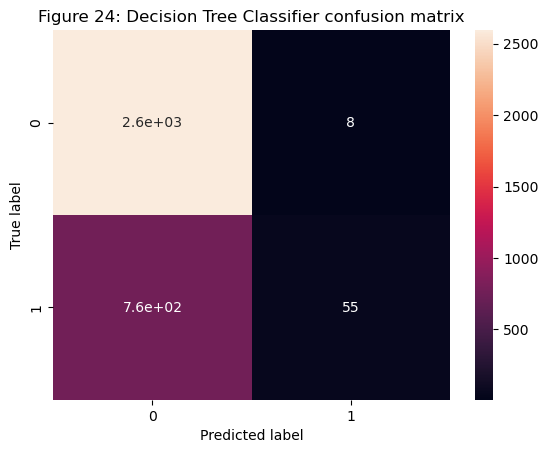

In [48]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
sns.heatmap(cm, annot = True) 
plt.title('Figure 24: Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [49]:
print(classification_report( y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2603
           1       0.87      0.07      0.13       813

    accuracy                           0.78      3416
   macro avg       0.82      0.53      0.50      3416
weighted avg       0.80      0.78      0.69      3416



#### Model Summary
- Accuracy score on train and test set are 0.7768574297188755, 0.7757611241217799 respectively. They are almost the same so there is no overfitting and underfitting problem.
- Overall, the precision metric of class 0 is low (0,07%)
    - Precision (0 - NO) : 0.07% 
    - Recall (0 - NO) : 87% 
    - Precision (1 - YES) : 100%
    - Recall (1 - YES) : 77% 


In [50]:
recall = recall_score(y_test, y_test_pred)
precision = precision_score (y_test, y_test_pred)
accuracy = accuracy_score (y_test, y_test_pred)
df_lg = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Logistic'])


### Task 3: Decision Tree
Build a decision tree model (at most 4 branches) to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the other two models (variables and accuracy).



In [51]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=4)
model = model.fit(X_train_std, y_train)

In [52]:
model.feature_importances_
df_fi = pd.DataFrame({'feature_name':X_train.columns,'feature_scores':model.feature_importances_})
df_fi = df_fi.sort_values(by = 'feature_scores',ascending=False)
df_fi.head(5)

feature_name  feature_scores
0              Sold As Vacant        0.652749
4                  Sale_Month        0.109085
5                    Sale_Day        0.062301
11  Property City_OLD HICKORY        0.047569
10      Property City_MADISON        0.037661

The top 5 important variables contribute to the prediction in this decision tree are: Acreage, Sale_Month, Sale_Day Dt_Dayofweek, and Foundation Type_FULL BSMT

In [53]:
y_test_pred_t = model.predict(X_test_std)
y_train_pred_t = model.predict(X_train_std)
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_t )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_t)}')
print(classification_report( y_test, y_test_pred_t))

 Accuracy score on train set is: 0.7781124497991968
 Accuracy score on test set is: 0.772248243559719
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2603
           1       0.77      0.06      0.11       813

    accuracy                           0.77      3416
   macro avg       0.77      0.53      0.49      3416
weighted avg       0.77      0.77      0.69      3416



#### Model Summary
- Accuracy score on train and test set are 0.9954819277108434, 0.6612997658079626 respectively. The model is overfitting because the Accuracy of train is around 30% larger than the accuracy of the test set. 
- Overall, the precision metric of class 0 is low (0,07%)
    - Precision (0 - NO) : 0.07% 
    - Recall (0 - NO) : 78% 
    - Precision (1 - YES) : 99%
    - Recall (1 - YES) : 77% 



In [54]:
recall = recall_score(y_test, y_test_pred_t)
precision = precision_score (y_test, y_test_pred_t)
accuracy = accuracy_score (y_test, y_test_pred_t)
df_t = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Decision_tree'])


### Task 4: Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit (X_train_std, y_train)

In [56]:
y_test_pred_rf = rf_clf.predict(X_test_std)
y_train_pred_rf = rf_clf.predict(X_train_std)

[[2495  108]
 [ 711  102]]


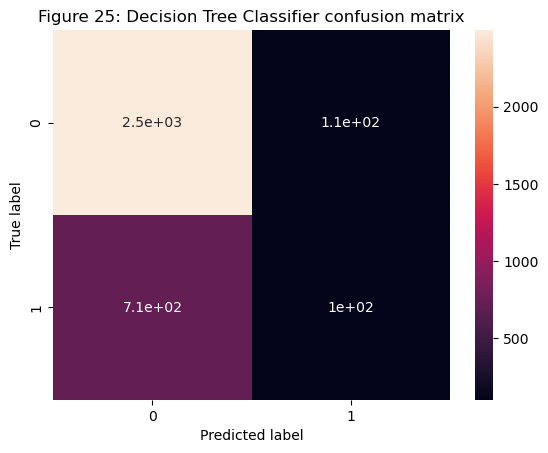

In [57]:
cm = confusion_matrix(y_test, y_test_pred_rf)
print(cm)
sns.heatmap(cm, annot = True) 
plt.title('Figure 25: Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [58]:
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_rf )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_rf)}')
print(classification_report( y_test, y_test_pred_rf))

 Accuracy score on train set is: 0.9954819277108434
 Accuracy score on test set is: 0.7602459016393442
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2603
           1       0.49      0.13      0.20       813

    accuracy                           0.76      3416
   macro avg       0.63      0.54      0.53      3416
weighted avg       0.71      0.76      0.70      3416



#### Model Summary
- Accuracy score on train and test set are 0.9954819277108434, 0.7611241217798594 respectively. 
There is a 22% gap so there might be overfitting problem.
- Overall, the precision metric of class 0 is improved compare to logistic and Decision Tree with a trade off of an decrease in recall (0-No) 
    - Precision (0 - NO) : 0.13% 
    - Recall (0 - NO) : 47% 
    - Precision (1 - YES) : 95%
    - Recall (1 - YES) : 78% 



In [59]:
recall = recall_score(y_test, y_test_pred_rf)
precision = precision_score (y_test, y_test_pred_rf)
accuracy = accuracy_score (y_test, y_test_pred_rf)
df_rf = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Random_Forest'])


### Task 5: XGBOOST

In [60]:
# Fitting the classifier classifier to the Training set
# !pip install xgboost

import xgboost as xgb
D_train = xgb.DMatrix(X_train_std, label=y_train)
D_test = xgb.DMatrix(X_test_std, label=y_test)

## Set the parameters
param = {
    'eta': 0.2,   
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20 

In [61]:
model = xgb.train(param, D_train, steps)

In [62]:

preds_t = model.predict(D_test)
preds_tr = model.predict(D_train)
y_test_pred_xg = np.asarray([np.argmax(line) for line in preds_t])
y_train_pred_xg = np.asarray([np.argmax(line) for line in preds_tr])

In [63]:
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_xg )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_xg)}')
print(classification_report( y_test, y_test_pred_xg))

 Accuracy score on train set is: 0.7838855421686747
 Accuracy score on test set is: 0.7734192037470726
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2603
           1       0.77      0.07      0.13       813

    accuracy                           0.77      3416
   macro avg       0.77      0.53      0.50      3416
weighted avg       0.77      0.77      0.69      3416



In [64]:
recall = recall_score(y_test, y_test_pred_xg)
precision = precision_score (y_test, y_test_pred_xg)
accuracy = accuracy_score (y_test, y_test_pred_xg)
df_xg = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['XgBoost'])


In [65]:
recall

0.06888068880688807

### Task 6: Neural Network

In [67]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,),
    max_iter=15,
    alpha=1e-4,
    solver="sgd",
    verbose=True,
    random_state=1,
    learning_rate_init=0.1)
clf.fit(X_train_std, y_train)    


Iteration 1, loss = 0.55420570
Iteration 2, loss = 0.52681514
Iteration 3, loss = 0.52663261
Iteration 4, loss = 0.52232335
Iteration 5, loss = 0.52148302
Iteration 6, loss = 0.52135783
Iteration 7, loss = 0.51884625
Iteration 8, loss = 0.51842277
Iteration 9, loss = 0.51929309
Iteration 10, loss = 0.51804232
Iteration 11, loss = 0.51662905
Iteration 12, loss = 0.51469445
Iteration 13, loss = 0.51310440
Iteration 14, loss = 0.51340172
Iteration 15, loss = 0.51296375


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=15,
              random_state=1, solver='sgd', verbose=True)

In [68]:

y_test_pred_nn = clf.predict(X_test_std)
y_train_pred_nn = clf.predict(X_train_std)
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_nn )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_nn)}')
print(classification_report( y_test, y_test_pred_nn))


 Accuracy score on train set is: 0.78125
 Accuracy score on test set is: 0.772248243559719
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2603
           1       0.70      0.08      0.14       813

    accuracy                           0.77      3416
   macro avg       0.74      0.53      0.50      3416
weighted avg       0.76      0.77      0.69      3416



In [69]:
recall = recall_score(y_test, y_test_pred_nn)
precision = precision_score (y_test, y_test_pred_nn)
accuracy = accuracy_score (y_test, y_test_pred_nn)
df_nn = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Neural_Network'])

#### Model Summary
- Accuracy score on train and test set are 0.78, 0.77 respectively. 
There is not a big gap so there is no overfitting problem.
- Precion metric is lower compared to xgboost, however, the recall is 1% higher. 


In [ ]:
## tensorflow

In [ ]:


model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])
 
# after you create your model it's
# always a good habit to print out it's summary
model.summary()

### Task 7: Compare 5 models

Compare the accuracy of all the models (overall accuracy, precision, recall) and the overall variables that were deemed significant. Discuss which model you would recommend based on these three metrics. Discuss what key variables they should focus on and their business context once you select your final model (that should be the key takeaway).

In [70]:
combined_report = pd.concat([ df_lg,df_t,df_rf, df_xg,df_nn],axis=1)
combined_report = combined_report.round(2)
combined_report.sort_values(axis=1, by = "Accuracy").style.set_table_attributes("style='display:inline'").set_caption(' Recall, Precision, Accuracy of 5 models on Imbalanced Dataset')


### Findings:
- Decision tree has the lowest accuracy score of 76%. There accuracy scores between models are not much different (1% upper/lower)
- There is a trade of between Recall and Precision among the models:
    - Models with high recall has low precision
    - Models with low recall has high precision
- Random Forest has overfitting problem with accuracy score of Train and Test are 99% and 76%.


I believe that to predict underpriced houses, it's better to use a model with high precision than high recall. This means that when the model identifies a house as underpriced, it's highly likely to be correct, minimizing the risk of the company overpaying for a property. Even though the model may miss some underpriced houses, each prediction it makes with a high accurate rate. Therefore, I will choose logistic model with the accuracy of 78% and Precision of 87% for predicting the under value houses, helping company to find the best deal. 

The recall metrics are low because of the imbalanced datset. Next, I am going to try to Smote method to balance the data, improve the recall metrics. Also, to show the precision, recall trade off if we try to raise the Recall Metrics. 

### Solving unbalanced dataset - Smote method

In [71]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
### Test train split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X1,y, random_state = 42, test_size = 0.3)
# print(X_train.shape)
# print(X_test.shape)

SMOTE = SMOTE(random_state = 42)
X_train,y_train = SMOTE.fit_resample(X_train, y_train)
print(Counter(y_train))
## Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Counter({0: 6105, 1: 6105})


#### Logistics

In [72]:
log_reg = sm.Logit(y_train,X_train_std).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.629906
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            under_price   No. Observations:                12210
Model:                          Logit   Df Residuals:                    12183
Method:                           MLE   Df Model:                           26
Date:                Wed, 17 May 2023   Pseudo R-squ.:                 0.09124
Time:                        09:05:31   Log-Likelihood:                -7691.2
converged:                       True   LL-Null:                       -8463.3
Covariance Type:            nonrobust   LLR p-value:                4.266e-310
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3519      0.042      8.440      0.000       0.270       0.434
x2            -0.1367      0.024     -5.779      0.000      -0.183      -0.090
x3            -0.1197      0.021     -5.640      0.000      -0.161      -0.078
x4            -0.0337      0.020     -1.711      0.087      -0.072       0.005
x5            -0.1483      0.019     -7.660      0.000      -0.186      -0.110
x6            -0.0958      0.019     -4.957      0.000      -0.134      -0.058
x7            -0.1253      0.019     -6.448      0.000      -0.163      -0.087
x8            -0.0330      0.021     -1.562      0.118      -0.074       0.008
x9            -0.1223      0.033     -3.685      0.000      -0.187      -0.057
x10           -0.2637      0.022    -11.938      0.000      -0.307      -0.220
x11           -0.1099      0.020     -5.585      0.000      -0.148      -0.071
x12           -0.0725      0.021     -3.530      0.000      -0.113      -0.032
x13            0.0243      0.023      1.061      0.289      -0.021       0.069
x14           -0.3141      0.020    -15.535      0.000      -0.354      -0.275
x15           -0.0189      0.020     -0.939      0.348      -0.058       0.021
x16           -0.2056      0.020    -10.330      0.000      -0.245      -0.167
x17           -0.2965      0.022    -13.514      0.000      -0.340      -0.254
x18           -0.3604      0.022    -16.625      0.000      -0.403      -0.318
x19           -0.0155      0.019     -0.804      0.422      -0.053       0.022
x20           -0.2691      0.022    -12.183      0.000      -0.312      -0.226
x21           -0.0769      0.026     -2.932      0.003      -0.128      -0.025
x22           -0.0116      0.020     -0.595      0.552      -0.050       0.027
x23           -0.0528      0.173     -0.306      0.760      -0.391       0.286
x24           -0.0688      0.021     -3.355      0.001      -0.109      -0.029
x25           -0.0280      0.021     -1.360      0.174      -0.068       0.012
x26           -0.1321      0.020     -6.478      0.000      -0.172      -0.092
x27            0.0028      0.019      0.144      0.885      -0.035       0.041
==============================================================================
"""

In [73]:
log_reg = sm.Logit(y_train,X_train_std).fit()
log_reg.summary()
### Predict on test and train
yhat = log_reg.predict(X_test_std)
yhatr = log_reg.predict(X_train_std)
y_test_pred = list(map(round, yhat))
y_train_pred = list(map(round, yhatr))
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred)}')
print(classification_report( y_test, y_test_pred))
###The predictions obtained are fractional values(between 0 and 1) which denote the probability of getting admitted. These values are hence rounded, to obtain the discrete values of 1 or 0. 

Optimization terminated successfully.
         Current function value: 0.629906
         Iterations 9
 Accuracy score on train set is: 0.6468468468468469
 Accuracy score on test set is: 0.5655737704918032
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      2603
           1       0.27      0.47      0.34       813

    accuracy                           0.57      3416
   macro avg       0.52      0.53      0.51      3416
weighted avg       0.66      0.57      0.60      3416



[[1551 1052]
 [ 432  381]]


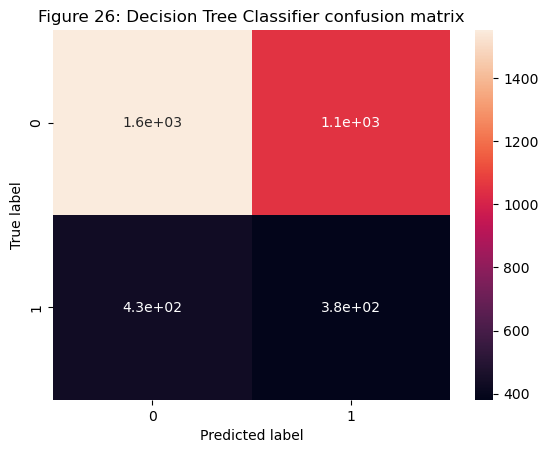

In [74]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
sns.heatmap(cm, annot = True) 
plt.title('Figure 26: Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [75]:
c_logit = classification_report(y_test_pred, y_test, output_dict=True)
df_logit = pd.DataFrame(c_logit).transpose()
df_logit = df_logit.drop('support', axis =1) 
df_logit = df_logit.drop(index = ['macro avg','weighted avg'])
# df_tree['Model'] = 'Tree Model'

In [76]:
recall = recall_score(y_test, y_test_pred)
precision = precision_score (y_test, y_test_pred)
accuracy = accuracy_score (y_test, y_test_pred)
df_sm_lg = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Logistic'])


#### Decision Tree

In [77]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 4)
model = model.fit(X_train_std, y_train)

In [78]:
model.feature_importances_
df_fi = pd.DataFrame({'feature_name':X_train.columns,'feature_scores':model.feature_importances_})
df_fi = df_fi.sort_values(by = 'feature_scores',ascending=False)
df_fi.head(5)

feature_name  feature_scores
17  Exterior Wall_BRICK/FRAME        0.327002
9     Property City_HERMITAGE        0.208086
13  Foundation Type_FULL BSMT        0.201770
19        Exterior Wall_FRAME        0.152484
4                  Sale_Month        0.032967

In [79]:
y_test_pred_t = model.predict(X_test_std)
y_train_pred_t = model.predict(X_train_std)
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_t )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_t)}')
print(classification_report( y_test, y_test_pred_t))
recall = recall_score(y_test, y_test_pred_t)
precision = precision_score (y_test, y_test_pred_t)
accuracy = accuracy_score (y_test, y_test_pred_t)
df_sm_t = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Decision_tree'])


 Accuracy score on train set is: 0.5997542997542997
 Accuracy score on test set is: 0.5796252927400468
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      2603
           1       0.25      0.37      0.29       813

    accuracy                           0.58      3416
   macro avg       0.51      0.51      0.50      3416
weighted avg       0.64      0.58      0.60      3416



In [80]:
c_tree = classification_report(y_test_pred_t, y_test, output_dict=True)
df_tree = pd.DataFrame(c_tree).transpose()
df_tree = df_tree.drop('support', axis =1) 
df_tree = df_tree.drop(index = ['macro avg','weighted avg'])
# df_tree['Model'] = 'Tree Model'

#### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 4)
rf_clf = rf_clf.fit (X_train_std, y_train)
y_test_pred_rf = rf_clf.predict(X_test_std)
y_train_pred_rf = rf_clf.predict(X_train_std)
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_rf )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_rf)}')
print(classification_report( y_test, y_test_pred_rf,))
recall = recall_score(y_test, y_test_pred_rf)
precision = precision_score (y_test, y_test_pred_rf)
accuracy = accuracy_score (y_test, y_test_pred_rf)
df_sm_rf = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Random_Forest'])

 Accuracy score on train set is: 0.6610974610974611
 Accuracy score on test set is: 0.5383489461358314
              precision    recall  f1-score   support

           0       0.79      0.54      0.64      2603
           1       0.27      0.54      0.36       813

    accuracy                           0.54      3416
   macro avg       0.53      0.54      0.50      3416
weighted avg       0.66      0.54      0.57      3416



#### XGBOOST

In [82]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train_std, label=y_train)
D_test = xgb.DMatrix(X_test_std, label=y_test)

## Set the parameters
param = {
    'eta': 0.2, 
    'max_depth': 4,  
    'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20 
model = xgb.train(param, D_train, steps)
preds_t = model.predict(D_test)
preds_tr = model.predict(D_train)
y_test_pred_xg = np.asarray([np.argmax(line) for line in preds_t])
y_train_pred_xg = np.asarray([np.argmax(line) for line in preds_tr])

print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_xg )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_xg)}')
print(classification_report( y_test,y_test_pred_xg))

recall = recall_score(y_test, y_test_pred_xg)
precision = precision_score (y_test, y_test_pred_xg)
accuracy = accuracy_score (y_test, y_test_pred_xg)
df_sm_xg = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['XgBoost'])

 Accuracy score on train set is: 0.6941850941850942
 Accuracy score on test set is: 0.6337822014051522
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      2603
           1       0.29      0.37      0.33       813

    accuracy                           0.63      3416
   macro avg       0.54      0.54      0.54      3416
weighted avg       0.67      0.63      0.65      3416



#### Neural Network 

In [83]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd',  random_state=21,tol=0.000000001)
clf.fit(X_train_std, y_train) 
y_test_pred_nn = clf.predict(X_test_std)
y_train_pred_nn = clf.predict(X_train_std)
print(f' Accuracy score on train set is: {accuracy_score(y_train, y_train_pred_nn )}')
print(f' Accuracy score on test set is: {accuracy_score(y_test, y_test_pred_nn)}')
print(classification_report(y_test, y_test_pred_nn))

 Accuracy score on train set is: 0.7565929565929566
 Accuracy score on test set is: 0.5529859484777517
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      2603
           1       0.26      0.49      0.34       813

    accuracy                           0.55      3416
   macro avg       0.52      0.53      0.50      3416
weighted avg       0.66      0.55      0.59      3416



In [84]:
recall = recall_score(y_test, y_test_pred_nn)
precision = precision_score (y_test, y_test_pred_nn)
accuracy = accuracy_score (y_test, y_test_pred_nn)
df_sm_nn = pd.DataFrame([recall,precision,accuracy], index = ['Recall','Precision','Accuracy'], columns = ['Neural_Network'])

In [85]:
combined_report_balanced = pd.concat([ df_sm_lg,df_sm_t,df_sm_rf, df_sm_xg,df_sm_nn],axis=1)
combined_report_balanced = combined_report_balanced.round(2)
combined_report_balanced.sort_values(axis=1, by = "Accuracy").style.set_table_attributes("style='display:inline'").set_caption('Recall, Precision, Accuracy of 5 models on Balanced Dataset')
Final_report = pd.concat([ combined_report, combined_report_balanced], keys = ['Imbalanced','Balanced'])
Final_report.style.set_table_attributes("style='display:inline'").set_caption('Table: Recall, Precision, Accuracy of 5 models on Balanced vs Imbalanced Dataset')
                                                                                                                                                                                                                                                                                                                                    


### Findings: 

- Even though the Recall of all the models improve significantly, there are decreases in Precision metrics.
- The accuracy scores are lower compare to those of imbalanced dataset. 


### Conclusion
- In the cleaning part, duplicated rows, columns, missing values, outliers are handled.
- The dataset is imbalanced so the Recall scores are low (<10%) while the Recall scores are high (87%. I try Smote sampling method which improves the Recall up to 55% (Random Forest). However, like I said above, there will be a trade off between Precision and Recall; the Precison declines. It based on the business situation to choose Precision over Recall or vice versa. 
- My final model to use Logistic model which has the higest Precision (87%) - Accuracy 78% . I choose high Precision because I believe it is the optimal one according to the purpose of the company - to find the best deals so a good model should be the the one when it predicts a house is underpriced, it "must" be underpriced, even at the expense of missing some underprices houses on the market. 


In [86]:
Final_report.style.set_table_attributes("style='display:inline'").set_caption('Table: Recall, Precision, Accuracy of 5 models on Balanced vs Imbalanced Dataset')

<h1><center>References</center></h1>

amandp13.Random Forest Classifier using Scikit-learn. Retrieved May 14, 2023, from https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/ 

Upadhyay,Amit.(Aug 10, 2020). Precision/Recall Tradeoff. Retrieved May 14, 2023, from https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134

Merge, join, and concatenate¶.pandas 0.20.3 documentation. Retrieved May 14, 2023, from https://pandas.pydata.org/pandas-docs/version/0.20/merging.html

jeeteshgavande30. Bar Plot in Matplotlib. Retrieved May 14, 2023, from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

Bonthu,Harika. (May 21, 2021). Detecting and Treating Outliers | Treating the odd one out! Analytics Vidhya. Retrieved May 14, 2023, from https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

Rendyk. (May 26, 2021).Tuning the Hyperparameters and Layers of Neural Network Deep Learning. Analytics Vidhya. Retrieved May 14, 2023, from https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/